In [1]:
## 1. Discovery:
# The topic we choose is employee attrition, We want to predeict whether the employees
# happy and satisfied or not by previous data we had. 
## 
# Employee attrition: what causes employees to quit?. Employee attrition is a major problem for 
# companies looking to grow in a structured way. The cost of hiring added to the time wasted searching
# for new employees for a vacant position can mean a massive burden for a company. For this reasons,
# being able to predict whether or not an employee is likely to resign, and the causes of the possible
# attrition, can allow the company to take all the necessary precautions and avoid a great waste of time
# and money. This paper aims to build several classification models with the goal of finding the one that
# not only performs well, but is also well explainable in order to provide companies with the ability to 
# improve those aspects that have been proven to produce attrition of their employees.

In [1]:
# 2. Data Preparation:
import pandas as pd
df = pd.read_csv('Project_Group1.csv', delimiter = ',')
display(df.head(10))


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   
7                24          1  Life Sciences              1              11   
8                23          3  Life Sciences              1              12   
9                27          3        Medical              1              13   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   
7  ...                         2            80                 1   
8  ...                         2            80                 0   
9  ...                         2            80                 2   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   
7                  1                      2               3               1   
8                 10                      2               3               9   
9                 17                      3               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  
7                  0                        0                     0  
8                  7                        1             

| Field | Type |
| -----| -----------------| 
| Age  | Numerical |
| Attrition   | Categorical|
| Business Travel  |Categorical|
| Daily Rate| Numerical|
| Department| Categorical|
| Distance From Home |Numerical|
| Education|Categorical|
| Education Field|Categorical|
| Employee Count|Numerical|
| Employee Number |Numerical|
| Environment Satisfaction  |Categorical|
| Gender | Categorical |
| Hourly Rate  | Numerical|
| Job Involvement |Categorical|
| Job Level|Categorical|
| Job Role |Categorical|
| Job Satisfaction| Categorical|
| Marital Status  |Categorical|
| Monthly Income|Numerical|
| Monthly Rate|Numerical|
| Num Companies Worked |Numerical|
| Over 18 |Categorical|
| OverTime |Categorical|
| Percent Salary Hike  |Numerical|
| Performance Rating   | Categorical|
| Relationship Satisfaction|Categorical|
| Standard Hours |Numerical|
| Stock Option Level   |Categorical|
| Total Working Years | Numerical|
| Training Times Last Year  |Numerical|
| Work Life Balance|Categorical|
| Years At Company |Numerical|
| Years In Current Role |Numerical|
| Years Since Last Promotion |Numerical|
| Years With Curr Manager  |Numerical|

In [2]:
if df.isnull().values.any()==False :
    print("There are no missing data")
    
else:
    print("There are missing data ")
    
df.isnull().sum()

There are no missing data


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
mdf=pd.read_csv('Project_Group1.csv', delimiter = ',') 
mdf.drop("EmployeeCount", axis=1, inplace=True) ## we dropped thses colums because they will not affect the output/unrelated
mdf.drop("EmployeeNumber", axis=1, inplace=True) ## since all value in Over18& EmployeeCount=1, EmployeeNumber= is 
mdf.drop("Over18", axis=1, inplace=True)         ## unique a number for each employee
mdf.drop("StandardHours", axis=1, inplace=True)  ## All values are 80                                                

from sklearn.compose import ColumnTransformer
Education_mapping={1:'Below College',
2:'College',
3:'Bachelor',
4:'Master', 5:'Doctor'}
EnvironmentSatisfaction_mapping={
1: 'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}
JobInvolvement_mapping={
1: 'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}
JobSatisfaction_mapping={
1: 'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}
PerformanceRating_mapping={
1: 'Low',
2: 'Good',
3: 'Excellent',
4: 'Outstanding'}
RelationshipSatisfaction_mapping={
1: 'Low',
2 :'Medium',
3 :'High',
4 :'Very High'}
WorkLifeBalance_mapping={
1: 'Bad',
2: 'Good',
3: 'Better',
4: 'Best'}
JobLevel_mapping={
1: 'Entry',
2 :'Intermediate',
3 :'Experienced',
4 :'Advanced ',
5:'Expert'}

StockOptionLevel_mapping={
0:'No Stock',
1:'Few Stocks',
2:'Medium Stocks',
3:'Many Stocks'}

mdf["Education"]=mdf["Education"].map(Education_mapping)
mdf["EnvironmentSatisfaction"]=mdf["EnvironmentSatisfaction"].map(EnvironmentSatisfaction_mapping)
mdf["JobInvolvement"]=mdf["JobInvolvement"].map(JobInvolvement_mapping)
mdf["JobSatisfaction"]=mdf["JobSatisfaction"].map(JobSatisfaction_mapping)
mdf["PerformanceRating"]=mdf["PerformanceRating"].map(PerformanceRating_mapping)
mdf["RelationshipSatisfaction"]=mdf["RelationshipSatisfaction"].map(RelationshipSatisfaction_mapping)
mdf["WorkLifeBalance"]=mdf["WorkLifeBalance"].map(WorkLifeBalance_mapping)
mdf['JobLevel']=mdf['JobLevel'].map(JobLevel_mapping)
mdf["StockOptionLevel"]=mdf["StockOptionLevel"].map(StockOptionLevel_mapping)

display(mdf)
display(mdf.info())




Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                    1        College  Life Sciences                  Medium   
1                    8  Below College  Life Sciences                    High   
2                    2        College          Other               Very High   
3                    3         Master  Life Sciences               Very High   
4                    2  Below College        Medical                     Low   
...                ...            ...            ...                     ...   
1465                23        College        Medical                    High   
1466                 6  Below College        Medical               Very High   
1467                 4       Bachelor  Life Sciences                  Medium   
1468                 2       Bachelor        Medical               Very High   
1469                 8       Bachelor        Medical                  Medium   

      Gender  ...  PerformanceRating RelationshipSatisfaction  \
0     Female  ...          Excellent                      Low   
1       Male  ...        Outstanding                Very High   
2       Male  ...          Excellent                   Medium   
3     Female  ...          Excellent                     High   
4       Male  ...          Excellent                Very High   
...      ...  ...                ...                      ...   
1465    Male  ...          Excellent                     High   
1466    Male  ...          Excellent                      Low   
1467    Male  ...        Outstanding                   Medium   
1468    Male  ...          Excellent                Very High   
1469    Male  ...          Excellent                      Low   

     StockOptionLevel TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  \
0            No Stock                 8                     0             Bad   
1          Few Stocks                10                     3          Better   
2            No Stock                 7                     3          Better   
3            No Stock                 8                     3          Better   
4          Few Stocks                 6                     3          Better   
...               ...               ...                   ...             ...   
1465       Few Stocks                17                     3          Better   
1466       Few Stocks                 9                     5          Better   
1467       Few Stocks                 6                     0          Better   
1468         No Stock                17                     3            Good   
1469         No Stock                 6                     3            Best   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

None

In [4]:
display(mdf.describe(include='number').T)
display(mdf.describe(include='object').T)


count          mean          std     min     25%  \
Age                      1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome         1470.0      9.192517     8.106864     1.0     2.0   
HourlyRate               1470.0     65.891156    20.329428    30.0    48.0   
MonthlyIncome            1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate              1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked       1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike        1470.0     15.209524     3.659938    11.0    12.0   
TotalWorkingYears        1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear    1470.0      2.799320     1.289271     0.0     2.0   
YearsAtCompany           1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole       1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion  1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager     1470.0      4.123129     3.568136     0.0     2.0   

                             50%       75%      max  
Age                         36.0     43.00     60.0  
DailyRate                  802.0   1157.00   1499.0  
DistanceFromHome             7.0     14.00     29.0  
HourlyRate                  66.0     83.75    100.0  
MonthlyIncome             4919.0   8379.00  19999.0  
MonthlyRate              14235.5  20461.50  26999.0  
NumCompaniesWorked           2.0      4.00      9.0  
PercentSalaryHike           14.0     18.00     25.0  
TotalWorkingYears           10.0     15.00     40.0  
TrainingTimesLastYear        3.0      3.00      6.0  
YearsAtCompany               5.0      9.00     40.0  
YearsInCurrentRole           3.0      7.00     18.0  
YearsSinceLastPromotion      1.0      3.00     15.0  
YearsWithCurrManager         3.0      7.00     17.0

count unique                     top  freq
Attrition                 1470      2                      No  1233
BusinessTravel            1470      3           Travel_Rarely  1043
Department                1470      3  Research & Development   961
Education                 1470      5                Bachelor   572
EducationField            1470      6           Life Sciences   606
EnvironmentSatisfaction   1470      4                    High   453
Gender                    1470      2                    Male   882
JobInvolvement            1470      4                    High   868
JobLevel                  1470      5                   Entry   543
JobRole                   1470      9         Sales Executive   326
JobSatisfaction           1470      4               Very High   459
MaritalStatus             1470      3                 Married   673
OverTime                  1470      2                      No  1054
PerformanceRating         1470      2               Excellent  1244
RelationshipSatisfaction  1470      4                    High   459
StockOptionLevel          1470      4                No Stock   631
WorkLifeBalance           1470      4                  Better   893

In [5]:
# df.drop("EmployeeCount", axis=1, inplace=True)
# df.drop("EmployeeNumber", axis=1, inplace=True)
# df.drop("Over18", axis=1, inplace=True)
# df.drop("StandardHours", axis=1, inplace=True)
# from sklearn.compose import ColumnTransformer
# Attrition_mapping = {
# 'No':0,
# 'Yes':1}
# BusinessTravel_mapping={
# 'Non-Travel':0,
# 'Travel_Rarely':1,
# 'Travel_Frequently':2}
# Department_mapping= {
# 'Sales':0,
# 'Research & Development':1,
# 'Human Resources':2}
# EducationField_mapping={
# 'Life Sciences':0,
# 'Other':1,
# 'Medical':2,
# 'Marketing':3,
# 'Technical Degree':4,
# 'Human Resources':5}
# Gender_mapping={
# 'Female':0,
# 'Male':1}
# JobRole_mapping={
# 'Sales Executive':0,
# 'Research Scientist':1,
# 'Laboratory Technician':2,
# 'Manufacturing Director':3,
# 'Healthcare Representative':4,
# 'Manager':5,
# 'Sales Representative':6,
# 'Research Director':7,
# 'Human Resources':8}
# MaritalStatus_mapping= {
# 'Single':0,
# 'Married':1,
# 'Divorced':2}
# OverTime_mapping={
# 'No':0,
# 'Yes':1}

# df['Attrition'] = df['Attrition'].map(Attrition_mapping)
# df['BusinessTravel'] = df['BusinessTravel'].map(BusinessTravel_mapping)
# df['Department'] = df['Department'].map(Department_mapping)
# df['EducationField'] = df['EducationField'].map(EducationField_mapping)
# df['Gender'] = df['Gender'].map(Gender_mapping)
# df['JobRole'] = df['JobRole'].map(JobRole_mapping)
# df['MaritalStatus'] = df['MaritalStatus'].map(MaritalStatus_mapping)
# df['OverTime'] = df['OverTime'].map(OverTime_mapping)
# display(df.head(10))


In [6]:
def outliers(mdf, feature):
    Q1= mdf[feature].quantile(0.25)
    Q3 = mdf[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
num_columns=mdf.select_dtypes(exclude='object').columns
for c in num_columns:
    upper, lower = outliers(mdf, c)
    index = mdf[(mdf[c] > upper)|(mdf[c] < lower)].index
    mdf.drop(index, inplace=True)



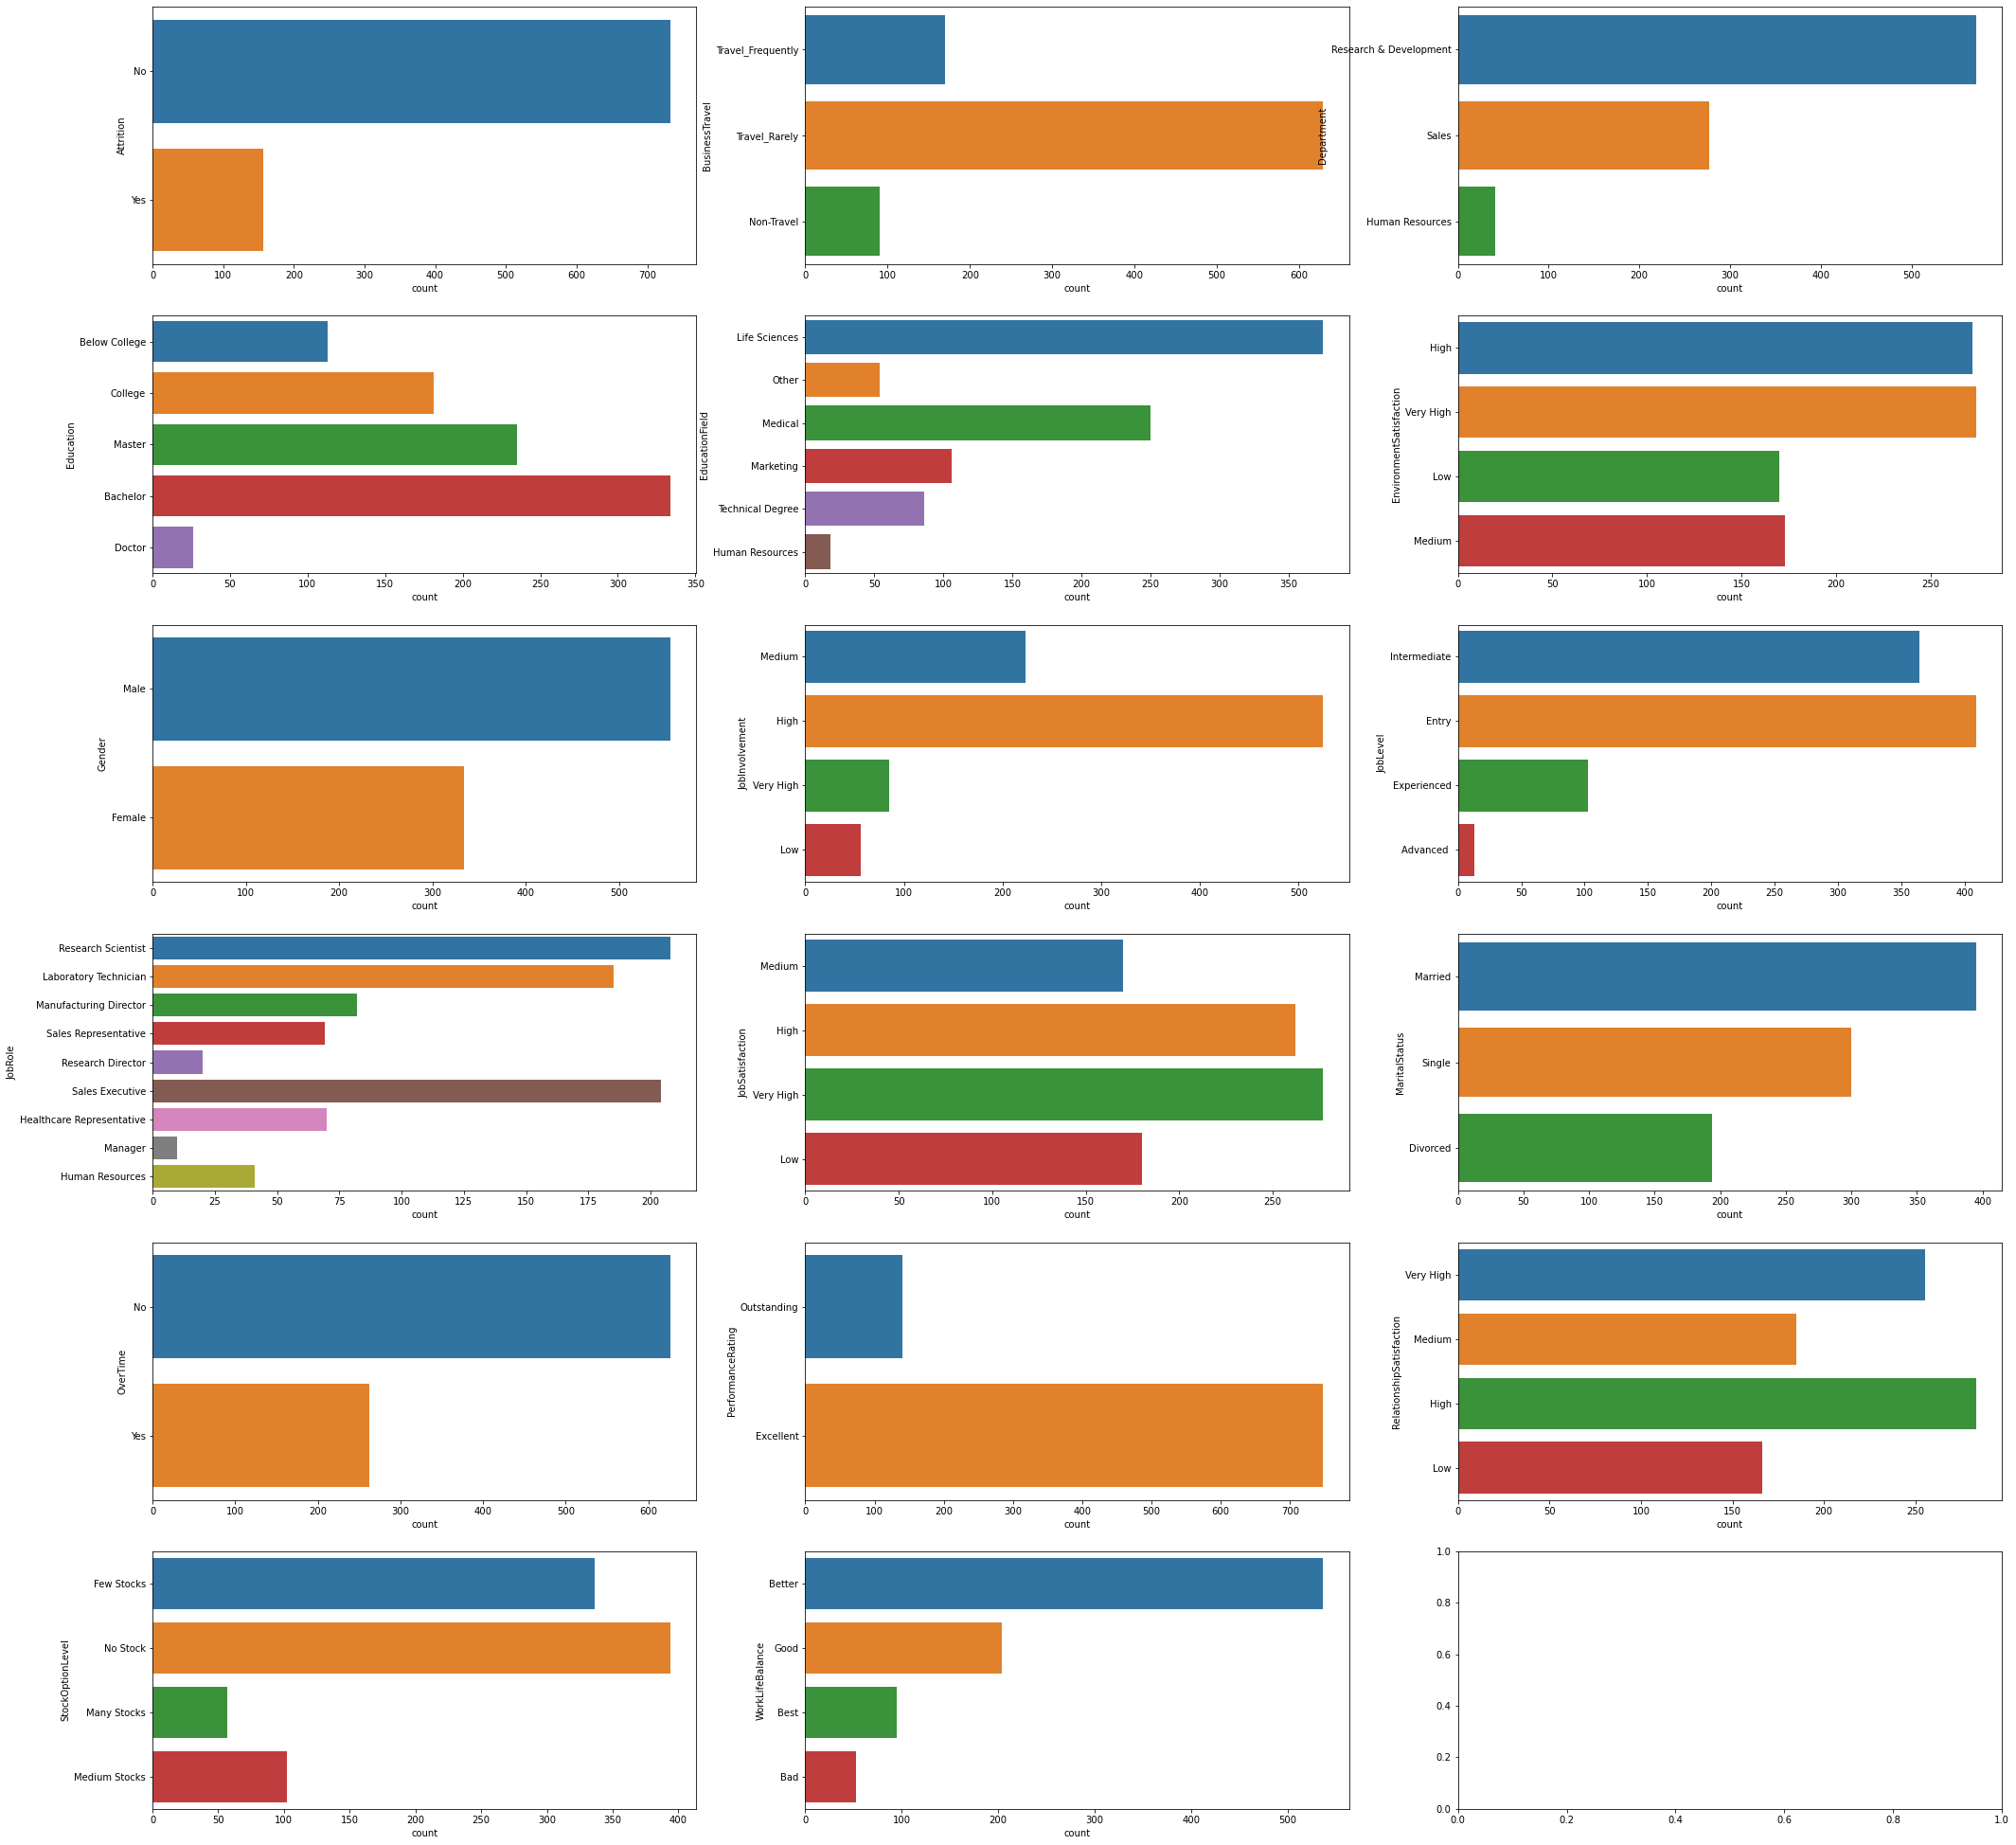

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
cat_columns = mdf.select_dtypes(include='object').columns
fig,axes = plt.subplots(6, 3, figsize=(35,35))
for ind,col in enumerate(cat_columns):
    sns.countplot(y=col,data=mdf,ax=axes.flatten()[ind])
plt.show()


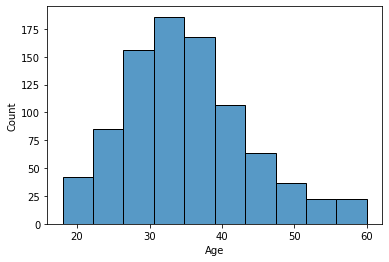

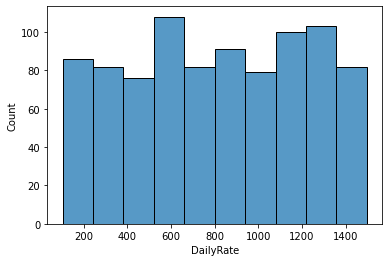

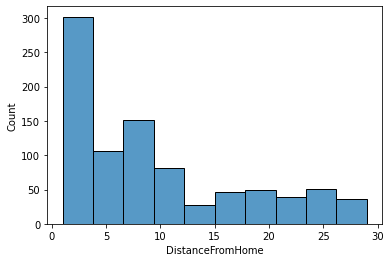

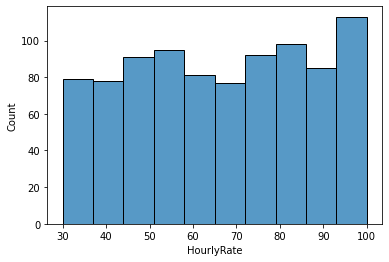

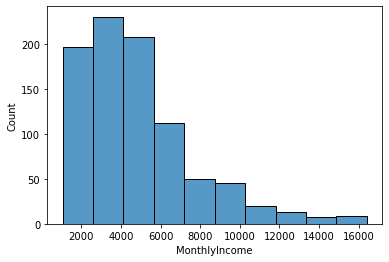

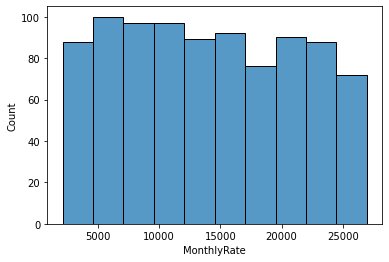

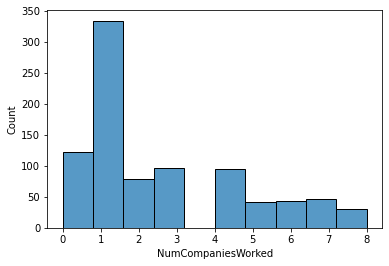

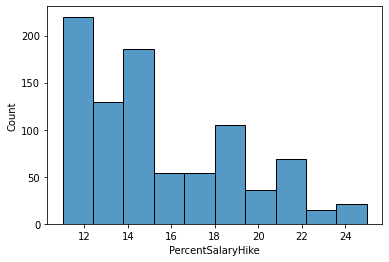

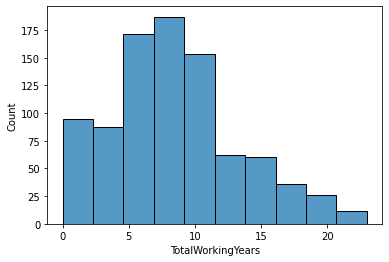

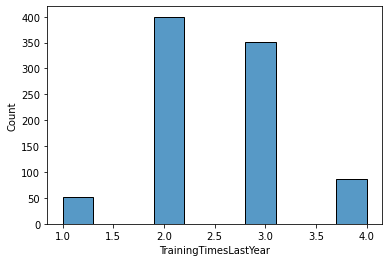

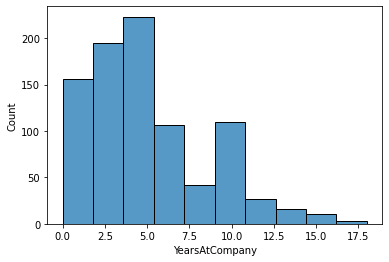

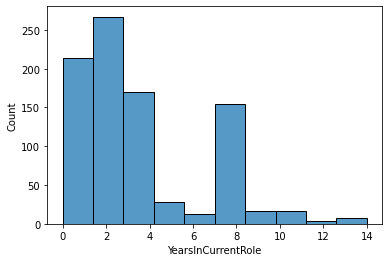

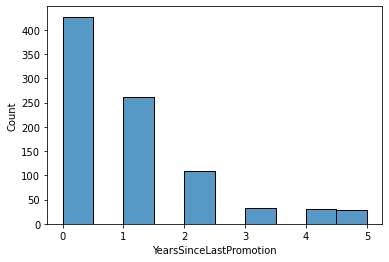

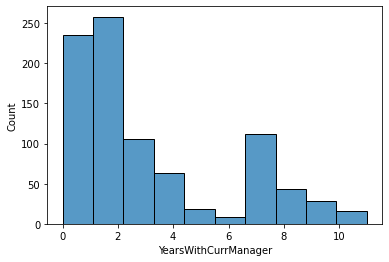

In [8]:
num_columns0=mdf.select_dtypes(exclude='object').columns
for c in num_columns0:
    plt.figure()
    sns.histplot(x=c,bins=10,data=mdf);
    plt.show()

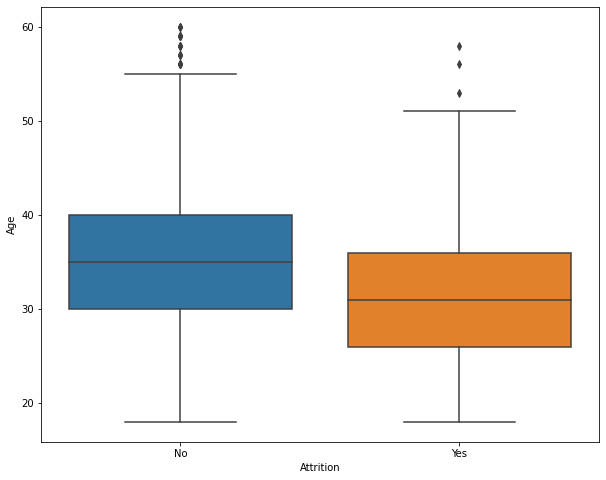

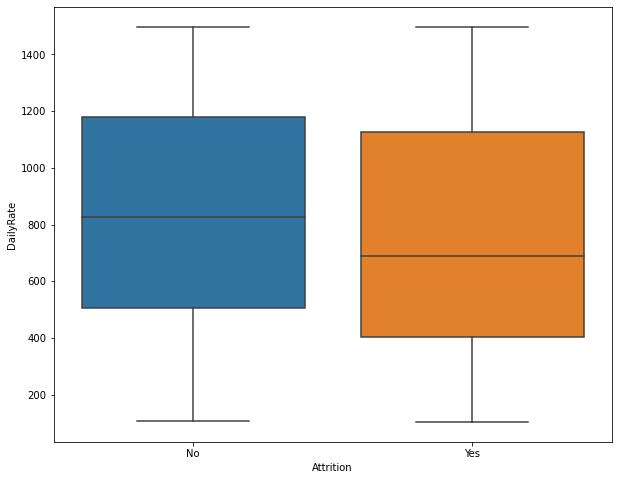

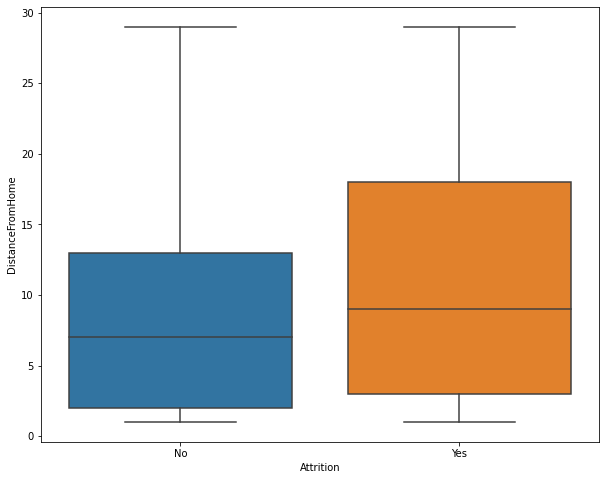

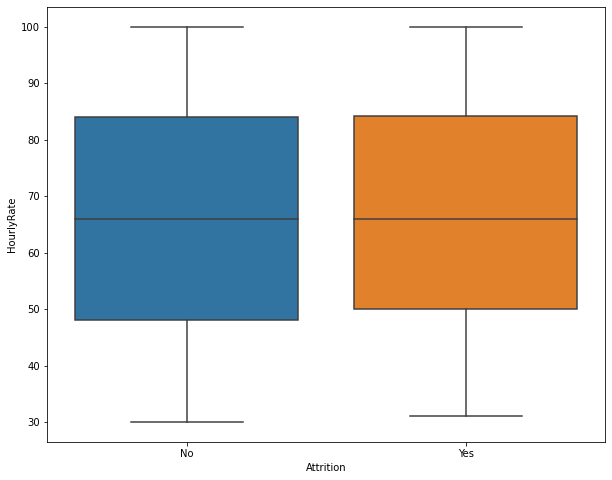

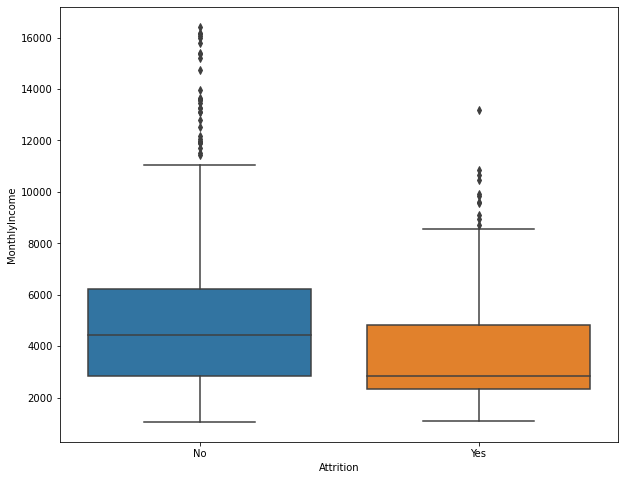

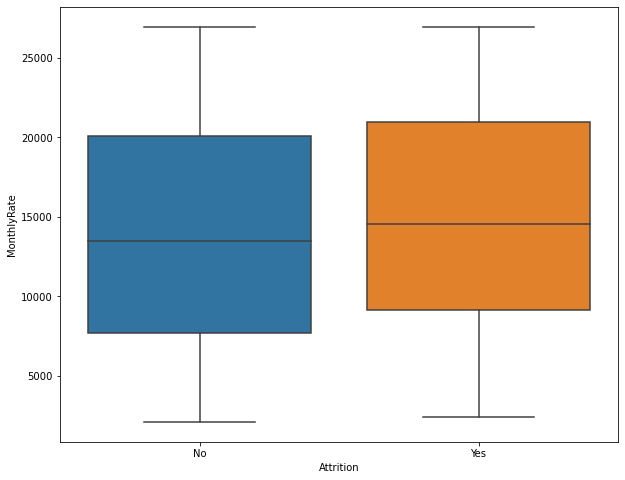

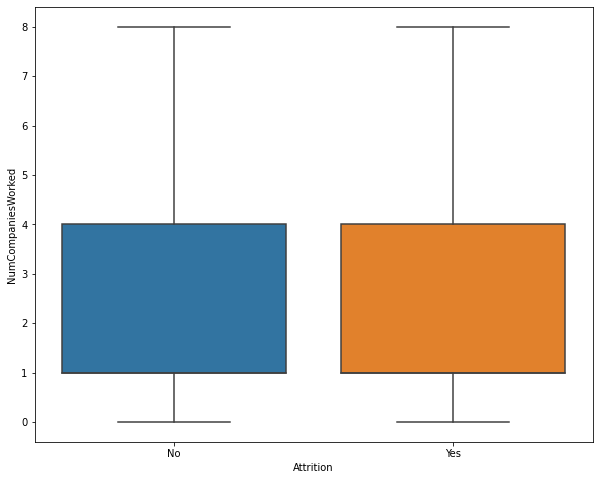

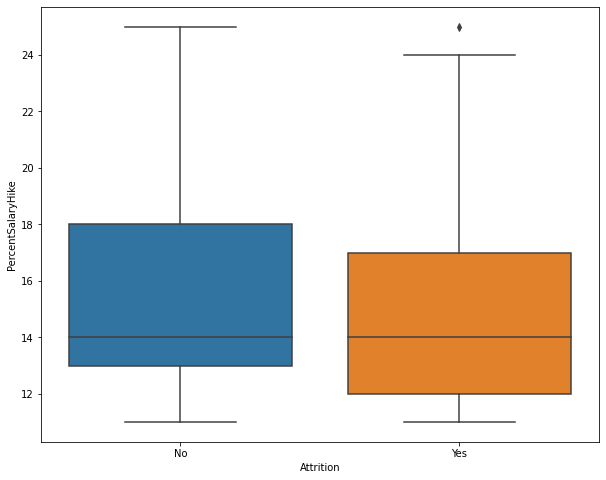

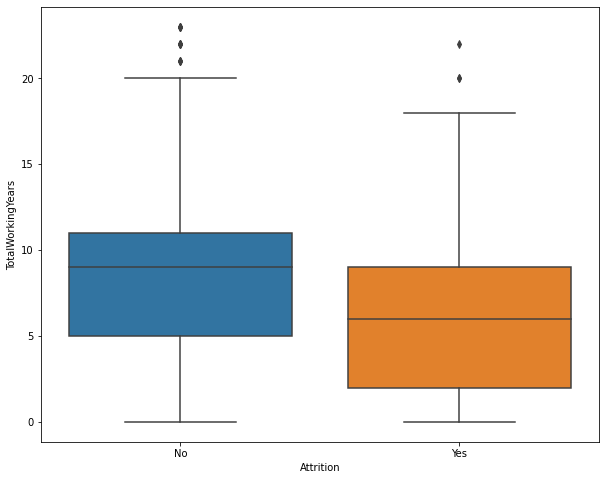

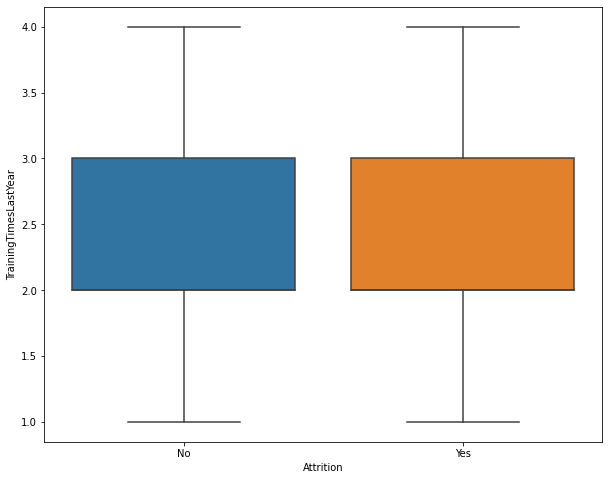

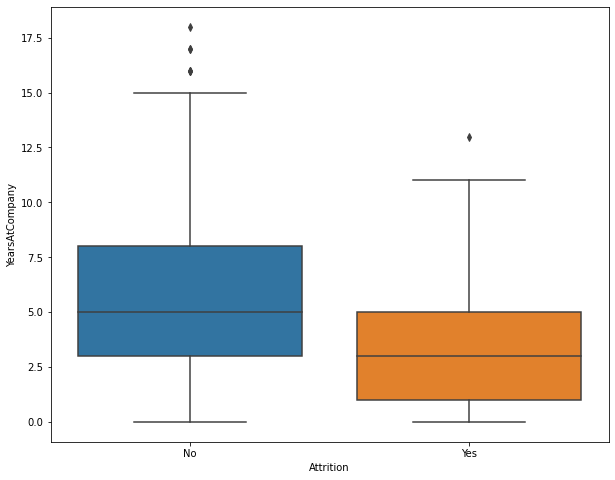

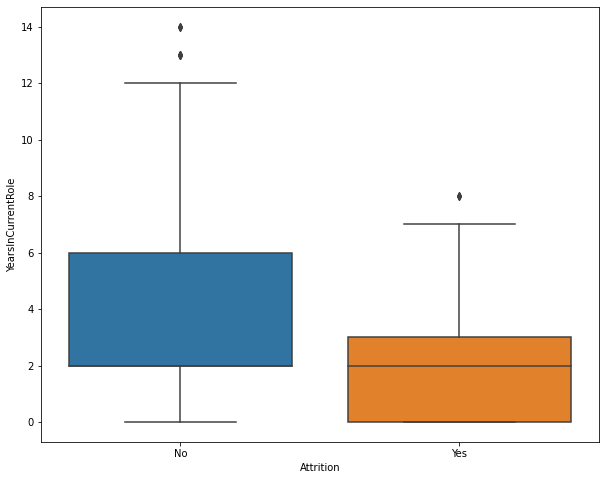

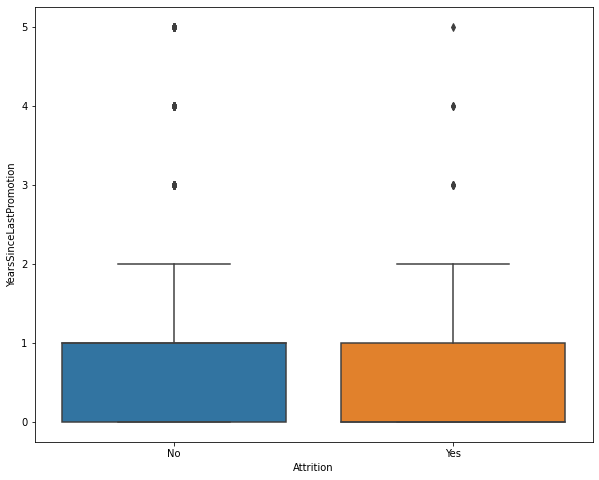

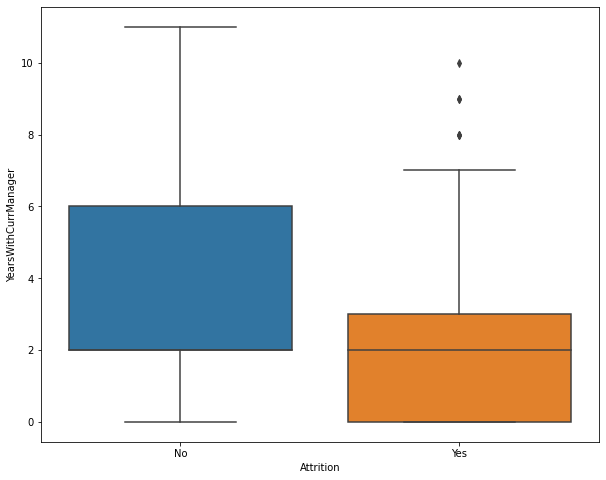

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


for c in num_columns0:
    plt.figure(figsize=(10,8))
    sns.boxplot(y=c, x='Attrition' , data=mdf)
    plt.show()
    
 



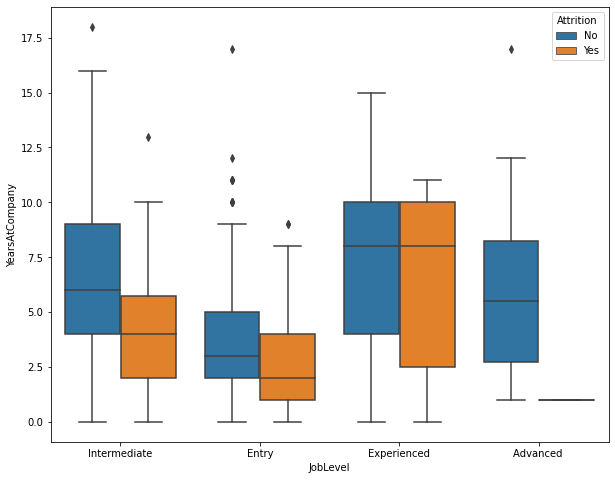

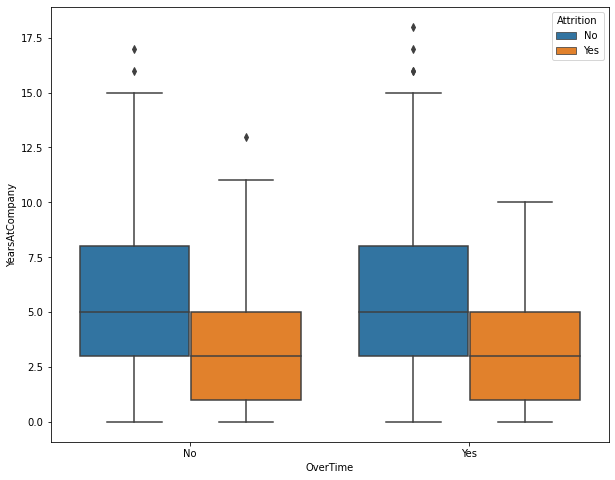

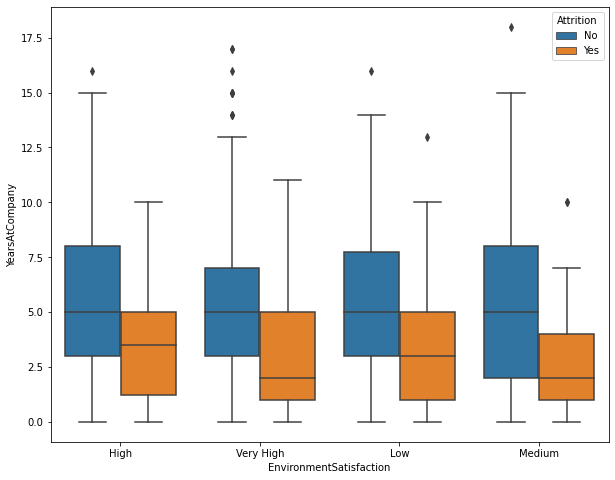

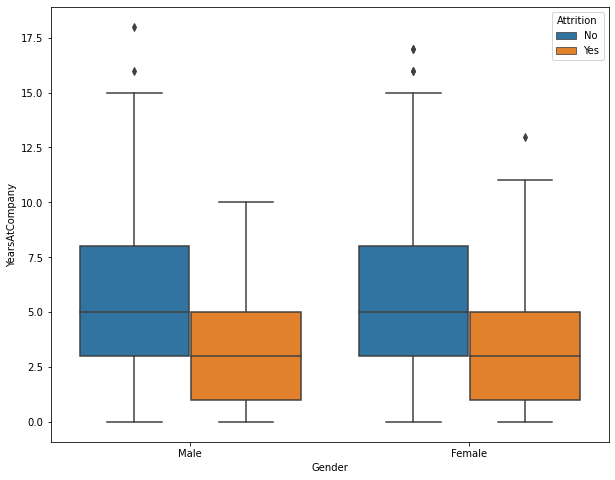

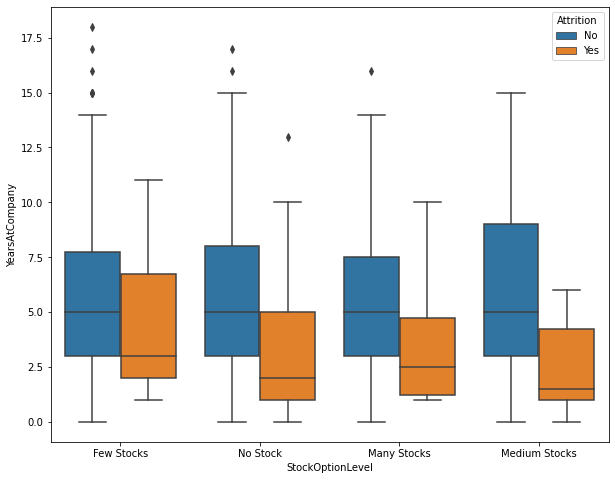

In [10]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(x ='JobLevel', y ='YearsAtCompany', hue='Attrition', data = mdf) 
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x ='OverTime', y ='YearsAtCompany', hue='Attrition', data = mdf) 
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x ='EnvironmentSatisfaction', y ='YearsAtCompany', hue='Attrition', data = mdf) 
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x ='Gender', y ='YearsAtCompany', hue='Attrition', data = mdf) 
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(x ='StockOptionLevel', y ='YearsAtCompany', hue='Attrition', data = mdf) 
plt.show()


In [11]:
corr=mdf[num_columns0].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

In [12]:
#### Summarization of our finding:

### 
## The Monthly Income has a reltatevly strong correlation with Total Working Years and some correlation with the Age
# as the Total Working Years (which means Age Also) increases, the Monthly Income will increase.

###
## The Years In Current Role has a strong positive correlation with Years At Company & Years Since Last Promotion &
# Years With Current Manager. 

###
## Many factors do not provide any information regarding attrition. some of these factors are such as Gender and 
# Years since promotion to name a few. As such it might have been more efficient to try and eleminate some attributes

In [13]:
from sklearn.compose import ColumnTransformer
Attrition_mapping = {
'No':0,
'Yes':1}
BusinessTravel_mapping={
'Non-Travel':0,
'Travel_Rarely':1,
'Travel_Frequently':2}
Department_mapping= {
'Sales':0,
'Research & Development':1,
'Human Resources':2}
EducationField_mapping={
'Life Sciences':0,
'Other':1,
'Medical':2,
'Marketing':3,
'Technical Degree':4,
'Human Resources':5}
Gender_mapping={
'Female':0,
'Male':1}
JobRole_mapping={
'Sales Executive':0,
'Research Scientist':1,
'Laboratory Technician':2,
'Manufacturing Director':3,
'Healthcare Representative':4,
'Manager':5,
'Sales Representative':6,
'Research Director':7,
'Human Resources':8}
MaritalStatus_mapping= {
'Single':0,
'Married':1,
'Divorced':2}
OverTime_mapping={
'No':0,
'Yes':1}

mdf['Attrition'] = mdf['Attrition'].map(Attrition_mapping)
mdf['BusinessTravel'] = mdf['BusinessTravel'].map(BusinessTravel_mapping)
mdf['Department'] = mdf['Department'].map(Department_mapping)
mdf['EducationField'] = mdf['EducationField'].map(EducationField_mapping)
mdf['Gender'] = mdf['Gender'].map(Gender_mapping)
mdf['JobRole'] = mdf['JobRole'].map(JobRole_mapping)
mdf['MaritalStatus'] = mdf['MaritalStatus'].map(MaritalStatus_mapping)
mdf['OverTime'] = mdf['OverTime'].map(OverTime_mapping)




Education_mapping={'Below College':1,
'College':2,
'Bachelor':3,
'Master':4, 'Doctor':5}
EnvironmentSatisfaction_mapping={
'Low': 1,
'Medium' :2,
'High' :3,
'Very High' :4}
JobInvolvement_mapping={
'Low': 1,
'Medium' :2,
'High' :3,
'Very High' :4}
JobSatisfaction_mapping={
'Low': 1,
'Medium' :2,
'High' :3,
'Very High' :4}

PerformanceRating_mapping={
'Low':1,
 'Good':2,
 'Excellent':3,
 'Outstanding':4}
RelationshipSatisfaction_mapping={
 'Low':1,
'Medium':2,
'High':3,
'Very High':4}
WorkLifeBalance_mapping={
 'Bad':1,
 'Good':2,
 'Better':3,
 'Best':4}
JobLevel_mapping={
'Entry':1,
'Intermediate':2,
'Experienced':3,
'Advanced ':4,
'Expert':5}

StockOptionLevel_mapping={
'No Stock':0,
'Few Stocks':1,
'Medium Stocks':2,
'Many Stocks':3}

mdf["Education"]=mdf["Education"].map(Education_mapping)
mdf["EnvironmentSatisfaction"]=mdf["EnvironmentSatisfaction"].map(EnvironmentSatisfaction_mapping)
mdf["JobInvolvement"]=mdf["JobInvolvement"].map(JobInvolvement_mapping)
mdf["JobSatisfaction"]=mdf["JobSatisfaction"].map(JobSatisfaction_mapping)
mdf["PerformanceRating"]=mdf["PerformanceRating"].map(PerformanceRating_mapping)
mdf["RelationshipSatisfaction"]=mdf["RelationshipSatisfaction"].map(RelationshipSatisfaction_mapping)
mdf["WorkLifeBalance"]=mdf["WorkLifeBalance"].map(WorkLifeBalance_mapping)
mdf['JobLevel']=mdf['JobLevel'].map(JobLevel_mapping)
mdf["StockOptionLevel"]=mdf["StockOptionLevel"].map(StockOptionLevel_mapping)

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
xo = mdf. drop("Attrition", axis=1)
X = xo.values
y = mdf.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
display(np.unique(y_test))

from sklearn import tree
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best', max_depth = 3)
dtClf = dtClf.fit(X_train,y_train)
dt_y_pred = dtClf.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize =(15,15), dpi = 1000)
tree.plot_tree(dtClf,feature_names=xo.columns.tolist(),class_names=['0','1'], max_depth = 3, filled=True,rounded=True); 
plt.show()


array([0, 1], dtype=int64)

In [15]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

rf = RandomForestClassifier(n_estimators=6,criterion='entropy', random_state=0)#max_features=auto default,
rf = rf.fit(mdf.drop('Attrition', axis=1), mdf['Attrition'])



fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10), dpi=1000)
for index,axis in enumerate(axes.flatten()):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = mdf.columns[0:-1], 
                   class_names=['no','yes'],
                   filled = True,
                   max_depth=2,
                   ax = axis);

    axis.set_title('Estimator: ' + str(index+1), fontsize = 11)

In [16]:
dt_y_pred = dtClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision Tree: \n")
print("Accuracy:=",  accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, dt_y_pred) )

Decision Tree: 

Accuracy:= 0.846441947565543
Confusion Matrix:= 
 [[220   5]
 [ 36   6]]


In [17]:
from sklearn.naive_bayes import GaussianNB
NBClf2 = GaussianNB()   
NBClf2.fit(X_train,y_train)
NB_y_pred = NBClf2.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("NB for Numerical  Data: \n")
print("Accuracy:=",  accuracy_score(y_test, NB_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, NB_y_pred) )

NB for Numerical  Data: 

Accuracy:= 0.7378277153558053
Confusion Matrix:= 
 [[168  57]
 [ 13  29]]


In [18]:
rfClf =RandomForestClassifier(random_state=0,criterion='entropy')
rfClf = rfClf.fit(X_train,y_train)
rf_y_pred = rfClf.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
print("Random Forest: \n")
print("Accuracy:=",  accuracy_score(y_test, rf_y_pred))
print("Confusion Matrix:= \n", confusion_matrix(y_test, rf_y_pred) )

Random Forest: 

Accuracy:= 0.8801498127340824
Confusion Matrix:= 
 [[223   2]
 [ 30  12]]


The variance captured by pca 1 is:  86.15%
The variance captured by pca 2 is:  13.57%


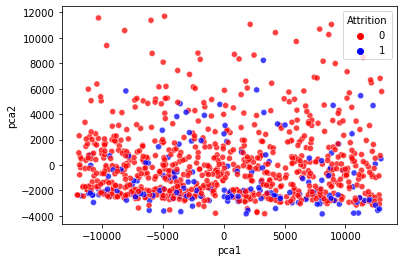

In [19]:
pca_input_columns=mdf.select_dtypes(include='number').columns.drop(['Attrition'])

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # get pca model

principalComponents = pca.fit_transform(mdf[pca_input_columns]) 



mdf['pca1'] = principalComponents[:,0]
mdf['pca2'] = principalComponents[:,1]

for ind,var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.2f}%')



plt.figure()
sns.scatterplot(x='pca1',y='pca2',
            hue='Attrition', palette=['r','b'],
            alpha=0.75,
            data=mdf)
plt.show()


In [ ]:
#5-operationalize
#The model should be applicable to almost all datasets pertaining to human resources. 
#The reason is that it takes all the information available and uses it as input variables
#That way we can figure out all the reasons why employees might leave the company.
#
#
#Regional differences between employees can affect output. 
#The behavioural differences might be related to the culture an employee belongs to.
#The information available to HR in different countries and the importance of different attributes 
#could result in unforeseeable differences in human behaviours
#Human behavior in general is a difficult to predict, which is why we try to build models to accurately predict it.
#As a result it is recommended to retrain the model using local data in order to maximize accuracy of predicting
# human behaviour and to not be misled by regional differences
#

In [ ]:
#6-Communicate results
# The highest accuracy was achieved using random forest classifier, which yielded an accuracy of about 88%. 
# Decision tree model and Naïve Bayes model but both yielded significantly lower accuracies, about 84% and 77% respectively
# The goal of our model is to predict employee attrition and as with any case regarding human behaviour it can be tricky.
# That might be why the random forest model was the most suitable model to use.
# randomly guessing the way we humans act might just be better than trying to understand the way we think. 
# since every single individual thinks in slightly different ways and trying to group us together could be futile

# or it could have been our approach on the subject is wrong.
# If another approach was taken where instead of trying to include all the available attributes
# and instead it focused on selecting only the important few attributes that contributed to the output
# then perhaps using a decision tree model in that scenario will be more efficient.

# However, in our attempt we reached an accuracy of 88% which we find extremely satisfactory especially since we are trying
# to predict human behaviour, which is regarded as random by many.